In [2]:
import csv
import re  
import time
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import warnings
warnings.filterwarnings('ignore')

In [5]:
links = []

driver = webdriver.Chrome()

urls = [
    {"full_link": 'https://priceoye.pk/laptops?', "pages": 6},
]

for url_info in urls:
    
    full_link = url_info["full_link"]
    pages = url_info["pages"]
    
    for page in range(1,pages+1):
        url = f'{full_link}{page}'
        driver.get(url)

        divs = driver.find_elements(By.CLASS_NAME,"product-title")
        for i in divs:
            a_tags = i.find_element(By.TAG_NAME,"h2")
            links.append(a_tags.get_attribute("href"))

driver.quit()

In [6]:
links

[]

In [ ]:
# Save links in file

df = pd.DataFrame(links,columns=['Links'])
df.to_csv("mega_pk_Links.csv",index=False)

In [ ]:
columns = ['Brand','Processor',
'Processor Speed','Installed RAM','Storage Capacity','Graphics memory',
'Screen resolution','Touchscreen','Weight','Fingerprint Reader',
'Backlit keyboard','LAN']

data = {}

In [ ]:
values = []
prices = []
count = 1

driver = webdriver.Chrome()

for url in links:
    driver.get(url)

    price = driver.find_element(By.ID,'price')
    brand = driver.find_element(By.CLASS_NAME,"product-title")

    if(count == 1):
        headers = driver.find_elements(By.CLASS_NAME, "ha")
        headers = [i.text.strip() for i in headers if i.text.strip()]
        data = {key: [] for key in headers}
        data["Brand"] = []
        count = count - 1

    info = driver.find_elements(By.CLASS_NAME,'val')
    info_text = [i.text if i.text != ' ' else 'nan' for i in info]

    for key, value in zip(headers, info_text):
        for j in range(len(columns)):
            if key.strip() == columns[j]:                
                data[key].append(value)

    prices.append(price.text)
    data['Brand'].append(brand.text)

driver.quit()

In [ ]:
copy = data.copy()

In [ ]:
extracted_columns = {key: copy[key.strip()] for key in columns}
extracted_columns

In [ ]:
for key, value in extracted_columns.items():
    if key in ['Processor', 'Processor Speed', 'Installed RAM', 'Storage Capacity']:
        for i in range(len(value) - 1, -1, -1):
            if i % 2 != 0:
                value.pop(i)

In [ ]:
for k,v in extracted_columns.items():
    print(f'{k}:{len(v)}')

In [ ]:
df = pd.DataFrame(extracted_columns)

In [ ]:
df.columns

In [ ]:
df['Price'] = prices

In [ ]:
df[['Price','Brand','Processor','Processor Speed','Installed RAM','Storage Capacity','Graphics memory','Screen resolution','Touchscreen','Weight','Fingerprint Reader','Backlit keyboard','LAN']]

In [4395]:
# df.to_csv('mega_laptop_data.csv',index=False)
mega_pk_data = pd.read_csv('mega_laptop_data.csv')
mega_pk_data.head(2)

,Brand,Processor,Processor Speed,Installed RAM,Storage Capacity,Graphics memory,Screen resolution,Touchscreen,Weight,Fingerprint Reader,Backlit keyboard,LAN,Price
0,ACER NITRO 16 AN16 RYZEN 7 16GB RAM 512GB SSD ...,AMD RYZEN 7-8845HS,up to 5.10 GHz,16GB,512GB SSD,6GB NVIDIA GeForce RTX 4050,16 Inches,No,2.44 kg,No,Yes,Yes,"294,999 - PKR"
1,ACER NITRO 16 AN16 RYZEN 7 16GB RAM 512GB SSD ...,AMD RYZEN 7-8845HS,up to 5.10 GHz,16GB,512GB SSD,8GB NVIDIA GeForce RTX 4060,16 Inches,No,2.44 kg,No,Yes,Yes,"329,999 - PKR"


In [4396]:
print(list(mega_pk_data.columns))

['Brand', 'Processor', 'Processor Speed', 'Installed RAM', 'Storage Capacity', 'Graphics memory', 'Screen resolution', 'Touchscreen', 'Weight', 'Fingerprint Reader', 'Backlit keyboard', 'LAN', 'Price']


In [4397]:
# Redefine Columns 
# 'Processor Type' ,'Color',<--- Should be added
new_columns = ['Price', 'Brand', 'Processor', 'Processor Speed', 'Installed RAM', 'Storage Capacity', 'Graphics memory', 'Screen resolution', 'Touchscreen',  'Weight', 'Fingerprint Reader', 'Backlit keyboard', 'LAN']
mega_pk_data =mega_pk_data[new_columns]

In [4398]:
mega_pk_data.head(2)

,Price,Brand,Processor,Processor Speed,Installed RAM,Storage Capacity,Graphics memory,Screen resolution,Touchscreen,Weight,Fingerprint Reader,Backlit keyboard,LAN
0,"294,999 - PKR",ACER NITRO 16 AN16 RYZEN 7 16GB RAM 512GB SSD ...,AMD RYZEN 7-8845HS,up to 5.10 GHz,16GB,512GB SSD,6GB NVIDIA GeForce RTX 4050,16 Inches,No,2.44 kg,No,Yes,Yes
1,"329,999 - PKR",ACER NITRO 16 AN16 RYZEN 7 16GB RAM 512GB SSD ...,AMD RYZEN 7-8845HS,up to 5.10 GHz,16GB,512GB SSD,8GB NVIDIA GeForce RTX 4060,16 Inches,No,2.44 kg,No,Yes,Yes


> ## Data Preprocessing 

In [4399]:
mega_pk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Price               190 non-null    object
 1   Brand               201 non-null    object
 2   Processor           201 non-null    object
 3   Processor Speed     178 non-null    object
 4   Installed RAM       201 non-null    object
 5   Storage Capacity    201 non-null    object
 6   Graphics memory     197 non-null    object
 7   Screen resolution   154 non-null    object
 8   Touchscreen         189 non-null    object
 9   Weight              164 non-null    object
 10  Fingerprint Reader  174 non-null    object
 11  Backlit keyboard    149 non-null    object
 12  LAN                 186 non-null    object
dtypes: object(13)
memory usage: 20.5+ KB


In [4400]:
mega_pk_data.isnull().sum()

Price                 11
Brand                  0
Processor              0
Processor Speed       23
Installed RAM          0
Storage Capacity       0
Graphics memory        4
Screen resolution     47
Touchscreen           12
Weight                37
Fingerprint Reader    27
Backlit keyboard      52
LAN                   15
dtype: int64

> ## price

In [4401]:
mega_pk_data['Price'].isnull().sum()


11

In [4402]:
mega_pk_data['Price'].unique()

array(['294,999 - PKR', '329,999 - PKR', '319,999 - PKR', '339,999 - PKR',
       '699,999 - PKR', '974,998 - PKR', '454,999 - PKR', '530,000 - PKR',
       '417,999 - PKR', '464,999 - PKR', '332,999 - PKR', '344,999 - PKR',
       '644,999 - PKR', '524,999 - PKR', '489,999 - PKR', '594,999 - PKR',
       '486,999 - PKR', '759,999 - PKR', nan, '479,999 - PKR',
       '629,999 - PKR', '234,999 - PKR', '351,999 - PKR', '406,999 - PKR',
       '379,999 - PKR', '252,999 - PKR', '389,999 - PKR', '396,999 - PKR',
       '334,999 - PKR', '347,999 - PKR', '364,999 - PKR', '122,999 - PKR',
       '194,999 - PKR', '279,999 - PKR', '352,999 - PKR', '399,999 - PKR',
       '559,999 - PKR', '529,999 - PKR', '579,999 - PKR', '859,999 - PKR',
       '514,999 - PKR', '169,999 - PKR', '159,999 - PKR', '354,999 - PKR',
       '232,999 - PKR', '166,999 - PKR', '167,999 - PKR', '254,999 - PKR',
       '369,999 - PKR', '104,999 - PKR', '133,999 - PKR', '164,999 - PKR',
       '144,999 - PKR', '179,999 - PK

In [4403]:
# Function to fix the price by keeping the first 6 digits
def fix_price(Price   ):
    if pd.isna(Price):
        return None
    if isinstance(Price, str):    
        Cleaned_price = Price.replace(',', '').replace(' - PKR', '')
        try:
            return int(Cleaned_price)
        except ValueError:
            return None
    return int(Price)

# Apply the function to the 'Price' column
mega_pk_data['Price'] = mega_pk_data['Price'].apply(fix_price).fillna(0).astype(int)
mega_pk_data['Price']

0      294999
1      329999
2      319999
3      339999
4      699999
        ...  
196    576999
197    463999
198    664999
199    495000
200    642999
Name: Price, Length: 201, dtype: int64

In [4404]:
mega_pk_data['Price'].isnull().sum()


0

In [4405]:
mega_pk_data['Price'].unique()


array([ 294999,  329999,  319999,  339999,  699999,  974998,  454999,
        530000,  417999,  464999,  332999,  344999,  644999,  524999,
        489999,  594999,  486999,  759999,       0,  479999,  629999,
        234999,  351999,  406999,  379999,  252999,  389999,  396999,
        334999,  347999,  364999,  122999,  194999,  279999,  352999,
        399999,  559999,  529999,  579999,  859999,  514999,  169999,
        159999,  354999,  232999,  166999,  167999,  254999,  369999,
        104999,  133999,  164999,  144999,  179999,  422999,  404999,
        157999,  105999,  161999,  150499,  156999,  183499,  220999,
        149999,  147999,  108999,  107999,  174999,  141999,  204999,
        154999,  121999,  171999,  177999,  108499,  116999,  184999,
        181999,  264999,  301999,  309999,  324999,  189999,  221999,
        244999,  274999,  285999,  272999,  584999,  418999,  229999,
        185999,  239999,  230000,  249999,  199999,  451999,  459999,
        250000,  196

In [4406]:
mega_pk_data['Price'] = mega_pk_data['Price'].replace( 0,100000, regex=False) # <--- ascii of nan is 100100 so i assume it 100000



In [4407]:
mega_pk_data['Price'].unique()


array([ 294999,  329999,  319999,  339999,  699999,  974998,  454999,
        530000,  417999,  464999,  332999,  344999,  644999,  524999,
        489999,  594999,  486999,  759999,  100000,  479999,  629999,
        234999,  351999,  406999,  379999,  252999,  389999,  396999,
        334999,  347999,  364999,  122999,  194999,  279999,  352999,
        399999,  559999,  529999,  579999,  859999,  514999,  169999,
        159999,  354999,  232999,  166999,  167999,  254999,  369999,
        104999,  133999,  164999,  144999,  179999,  422999,  404999,
        157999,  105999,  161999,  150499,  156999,  183499,  220999,
        149999,  147999,  108999,  107999,  174999,  141999,  204999,
        154999,  121999,  171999,  177999,  108499,  116999,  184999,
        181999,  264999,  301999,  309999,  324999,  189999,  221999,
        244999,  274999,  285999,  272999,  584999,  418999,  229999,
        185999,  239999,  230000,  249999,  199999,  451999,  459999,
        250000,  196

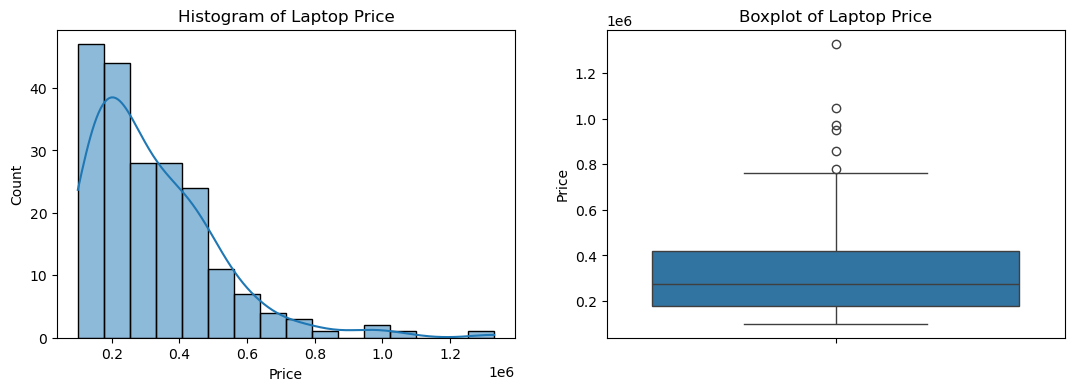

In [4408]:
plt.figure(figsize=(13,4 ))
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Price'], kde=True)
plt.title(f'Histogram of Laptop Price')

plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Price'])
plt.title(f'Boxplot of Laptop Price')
plt.show()

> ## Brand

In [4409]:
mega_pk_data['Brand'].unique()

array(['ACER NITRO 16 AN16 RYZEN 7 16GB RAM 512GB SSD 6GB RTX 4050 Windows 11',
       'ACER NITRO 16 AN16 RYZEN 7 16GB RAM 512GB SSD 8GB RTX 4060 Windows 11',
       'Acer Nitro V15 ANV15 Core i7 13th Generation 16GB RAM 512GB SSD 8GB RTX 4060 Windows 11',
       'Acer Nitro V15 ANV15 Core i9 13th Generation 16GB RAM 512GB SSD 8GB RTX 4060 Windows 11',
       'Acer Predator Helios 16 PH16-72 Core i9 14th Generation 32GB RAM 1TB SSD 12GB RTX 4080 Windows 11',
       'Acer Predator Helios 18 PH18-72 Core i9 14th Generation 64GB RAM 2TB SSD 16GB RTX 4090 Windows 11',
       'Acer Predator Helios Neo 14 PhN14-51 Core Ultra 9 32GB RAM 1TB SSD 8GB RTX 4060 Windows 11',
       'Acer Predator Helios Neo PHN16 71 96F6 Core i9 14th Generation 16GB RAM 1TB SSD 8GB RTX 4070 Windows 11',
       'Acer Predator Helios Neo PHN16 72 Core i9 14th Generation 16GB RAM 1TB SSD 8GB RTX 4060 Windows 11',
       'Acer Predator Triton Neo 16 PTN16-51 Core Ultra 9 32GB RAM 1TB SSD 8GB RTX 4060 Windows 11',
   

In [4410]:
mega_pk_data['Brand'] = mega_pk_data['Brand'].apply(lambda x: x.split()[0])

In [4411]:

mega_pk_data['Brand'].unique()

array(['ACER', 'Acer', 'Asus', 'ASUS', 'Dell', 'DELL', 'HP', 'Hp',
       'Lenovo', 'LENOVO', 'MSI', 'Samsung', 'Surface'], dtype=object)

In [4412]:
mega_pk_data['Brand'] = mega_pk_data['Brand'].replace('HP','Hp')
mega_pk_data['Brand'] = mega_pk_data['Brand'].replace('DELL','Dell')
mega_pk_data['Brand'] = mega_pk_data['Brand'].replace('LENOVO','Lenovo')
mega_pk_data['Brand'] = mega_pk_data['Brand'].replace('ASUS','Asus')
mega_pk_data['Brand'] = mega_pk_data['Brand'].replace('ACER','Acer')


In [4413]:
mega_pk_data['Brand'].unique()


array(['Acer', 'Asus', 'Dell', 'Hp', 'Lenovo', 'MSI', 'Samsung',
       'Surface'], dtype=object)

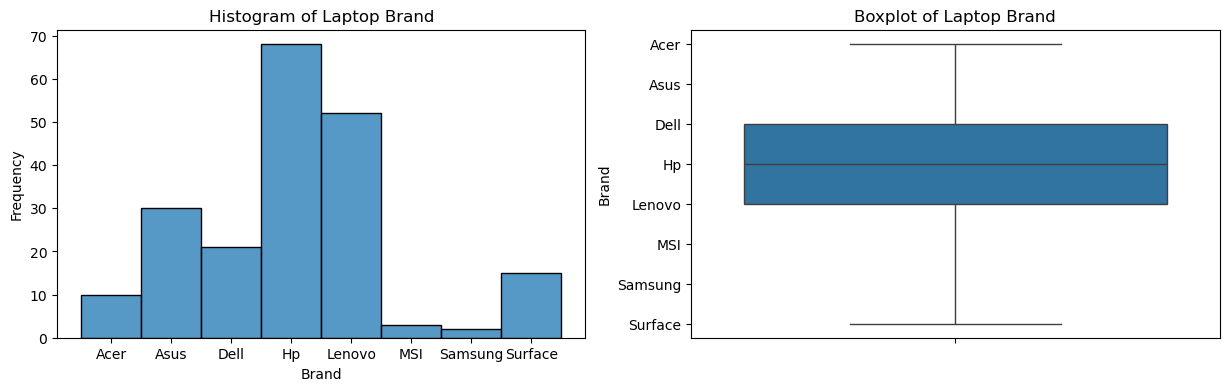

In [4414]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Brand'])
plt.ylabel('Frequency')
plt.title(f'Histogram of Laptop Brand')

plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Brand'])
plt.title(f'Boxplot of Laptop Brand')
plt.show()

> ##  Processor

In [4415]:
mega_pk_data['Processor'].unique()

array(['AMD RYZEN 7-8845HS', 'Core i7 13th Generation i7-13620H',
       'Core i9 13th Generation i9-13900H',
       'Core i9 14th Generation i9-14900HX', 'Intel Core Ultra 9-185H',
       'Core i9 13th Generation i9-13980HX', 'AMD Ryzen 9 7845HX',
       'Core i7 13th Generation i7-13650HX', 'AMD Ryzen 5 7535HS',
       'Core i7 13th Generation i7-13620H Processor',
       'Intel Core i5 12th Generation 12500H',
       'Core i7 13th Generation i7-13650HX Processor',
       'Core i7 13th Generation i7-13700H Processor',
       'AMD Ryzen 9 7940HS Mobile Processor',
       'Core Ultra 7 Processor 155H', 'Core Ultra 9 Processor 185H',
       'Core i3 13th Generation i3-1315U', 'Intel Core Ultra 5',
       'Intel Core Ultra 7', 'AMD RYZEN 7-8840HS',
       'Intel Core Ultra 7 Processor 155H',
       'Intel Core Ultra 9 Processor 185H',
       'Core i9 13th Generation i9-13900HK',
       'Core i7 13th Generation i7 13650HX',
       'Core i9 13th Generation i9-13900HX',
       'Intel Core i

In [4416]:
mega_pk_data['Processor'].isnull().sum()

0

In [4417]:

mega_pk_data['Processor Type'] = mega_pk_data['Processor'].str.extract(r'(Core \w+|i[3579]|Intel Core \w+|Intel|AMD RYZEN \d|AMD Ryzen \d|Core Ultra|Snapdragon|Core\s\w+)')
mega_pk_data['Processor Generation'] = mega_pk_data['Processor'].str.extract(r'(\d{1,2}(?:th|st|nd|rd) Generation| Ultra\s\d|RYZEN \d|Ryzen \d| X Elite)')
mega_pk_data=mega_pk_data.drop(columns=['Processor'])
mega_pk_data

,Price,Brand,Processor Speed,Installed RAM,Storage Capacity,Graphics memory,Screen resolution,Touchscreen,Weight,Fingerprint Reader,Backlit keyboard,LAN,Processor Type,Processor Generation
0,294999,Acer,up to 5.10 GHz,16GB,512GB SSD,6GB NVIDIA GeForce RTX 4050,16 Inches,No,2.44 kg,No,Yes,Yes,AMD RYZEN 7,RYZEN 7
1,329999,Acer,up to 5.10 GHz,16GB,512GB SSD,8GB NVIDIA GeForce RTX 4060,16 Inches,No,2.44 kg,No,Yes,Yes,AMD RYZEN 7,RYZEN 7
2,319999,Acer,up to 4.9 GHz,16GB,512GB SSD,8GB Nvidia RTX 4060 GDDR6,1920x1080,No,2.11 kg,No,Yes,Yes,Core i7,13th Generation
3,339999,Acer,up to 4.6 GHz,16GB,512GB SSD,8GB Nvidia RTX 4060 GDDR6,1920x1080,No,2.11 kg,No,Yes,Yes,Core i9,13th Generation
4,699999,Acer,2.20 GHz,32GB,1TB SSD,12GB NVIDIA GeForce RTX 4080 GDDR6,2560x1600,No,2.5kg,No,Yes,Yes,Core i9,14th Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,576999,Surface,NaN,32GB,1TB SSD,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,1.68 kg kg,Yes,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
197,463999,Surface,NaN,32GB,512GB SSD,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,1.68 kg kg,Yes,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
198,664999,Surface,NaN,64GB,1TB SSD,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,1.68 kg kg,Yes,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
199,495000,Surface,NaN,16GB,512GB SSD,Qualcomm Adreno,2304 x 1536,Yes,1.36 kg,No,Yes,NaN,Snapdragon,X Elite


> ## Processor Generation

In [4418]:
mega_pk_data['Processor Generation'].unique()

array(['RYZEN 7', '13th Generation', '14th Generation', ' Ultra 9',
       'Ryzen 9', 'Ryzen 5', '12th Generation', ' Ultra 7', ' Ultra 5',
       nan, 'Ryzen 7', '11th Generation', ' X Elite'], dtype=object)

In [4419]:
mega_pk_data['Processor Generation'].fillna('Unknown', inplace=True)







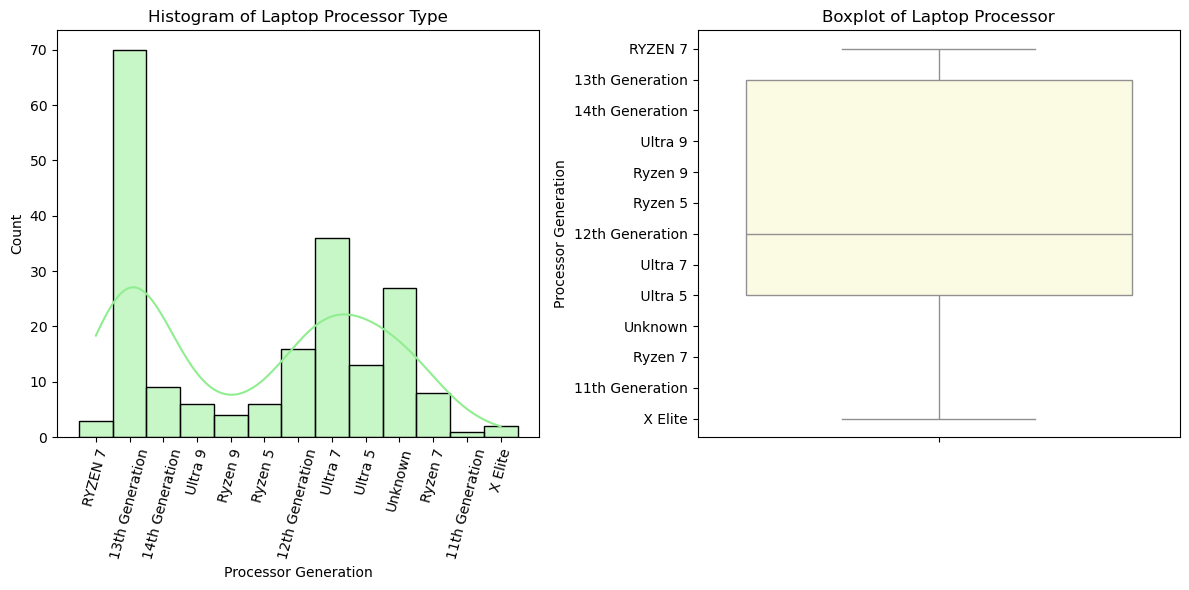

In [4420]:
plt.figure(figsize=(12,6 ))
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Processor Generation'], kde=True,color='lightgreen')
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title(f'Histogram of Laptop Processor Type')

plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Processor Generation'],color='lightyellow')
plt.title(f'Boxplot of Laptop Processor')
plt.tight_layout()
plt.show()

> ## Processor Type

In [4421]:
mega_pk_data['Processor Type'].unique()

array(['AMD RYZEN 7', 'Core i7', 'Core i9', 'Intel Core Ultra',
       'AMD Ryzen 9', 'AMD Ryzen 5', 'Intel Core i5', 'Core Ultra',
       'Core i3', 'Core i5', 'Intel Core i7', 'AMD Ryzen 7',
       'Intel Core i3', 'Intel Core 5', 'Intel Core 7', 'Intel Core i9',
       'Snapdragon'], dtype=object)

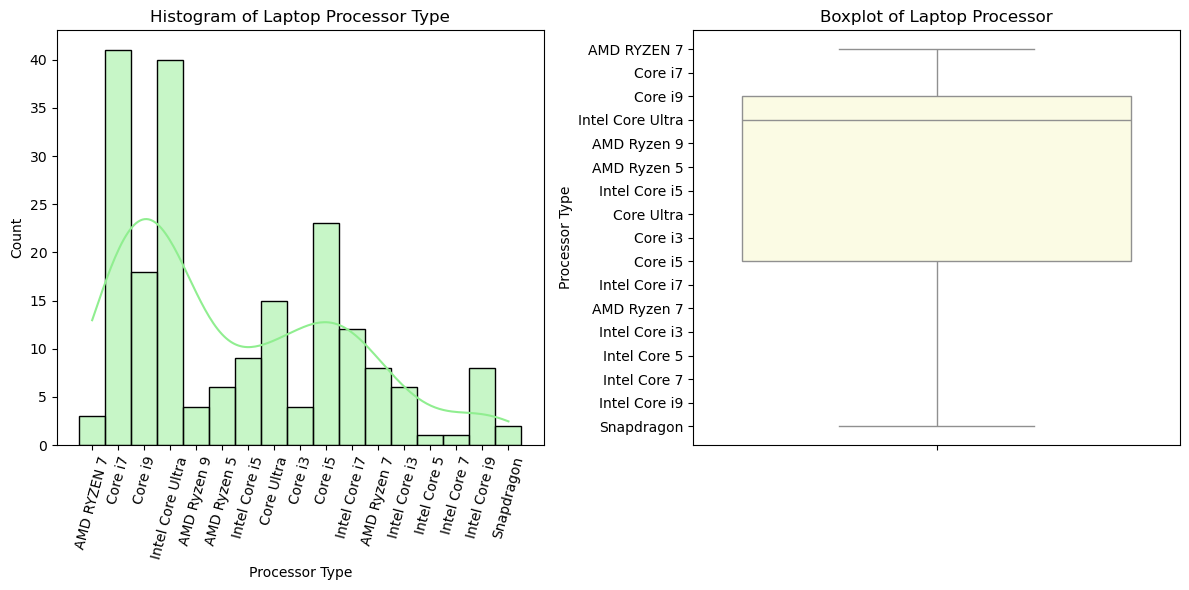

In [4422]:
plt.figure(figsize=(12,6 ))
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Processor Type'], kde=True,color='lightgreen')
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title(f'Histogram of Laptop Processor Type')

plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Processor Type'],color='lightyellow')
plt.title(f'Boxplot of Laptop Processor')
plt.tight_layout()
plt.show()

> ##  Processor Speed

In [4423]:
mega_pk_data['Processor Speed'].unique()

array(['up to 5.10 GHz', 'up to 4.9 GHz', 'up to 4.6 GHz', '2.20 GHz',
       'up to 5.40 GHz', 'up to 4.9GHz', 'up to 5.4GHz', 'up to 5.8GHz',
       'up to 5.2 GHz', 'up to 5.6GHz', 'up to 4.55 GHz', 'up to 4.5 GHz',
       'up to 5.0 GHz', 'Up to 5.2GHz', 'up to 5.1 GHz', 'up to 4.8 GHz',
       '1.2 GHz up to 4.5 GHz with Intel Turbo Boost Technology', nan,
       '1.4 GHz up to 4.8 GHz', '2.3 GHz up to 5.1 GHz', 'up to 5.4 GHz',
       'up to 4.90 GHz', 'up to 4.40 GHz', 'up to 4.4 GHz',
       'up to 4.7 GHz', '1.30 GHz to 4.60 GHz', 'up to 3.8 GHz',
       'Up to 5.0GHz', 'up to 4.3 GHz', 'up to 4.0 GHz', 'up to 4.7GHz',
       'up to 3.3 GHz', 'up to 3.4 GHz', 'up to 3.7 GHz',
       '1.3 GHz Max Turbo up to 4.3GHz', 'Up to 4.7 GHz',
       '3.8 GHz up to 5.1 GHz', '3.30 GHz', '1.3 GHz', 'up to 5.8 GHz',
       'upto 4.4 GHz', 'up to 5.20 GHz', 'up to 4.8GHz', 'up to 4.80 GHz',
       'upto 3.4GHz', 'upto 4.6GHz',
       'E-Core Max 3.60 GHz, P-Core Max 4.30 GHz with Turbo Boos

In [4424]:
print(mega_pk_data['Processor Speed'].isnull().sum())
null_values = mega_pk_data['Processor Speed'].isnull()
print("Null Values Count",mega_pk_data[null_values])

23
Null Values Count       Price    Brand Processor Speed Installed RAM Storage Capacity  \
35   194999     Asus             NaN           8GB            512GB   
36   279999     Asus             NaN          16GB              1TB   
76   204999       Hp             NaN           8GB        512GB SSD   
103  418999       Hp             NaN          32GB          1TB SSD   
123  250000       Hp             NaN           8GB            512GB   
124  329999       Hp             NaN          16GB            512GB   
131  114999   Lenovo             NaN           8GB            256GB   
142  100000   Lenovo             NaN          16GB        512GB SSD   
186  363499  Surface             NaN          16GB        256GB SSD   
187  437499  Surface             NaN          32GB        256GB SSD   
188  478499  Surface             NaN          32GB        512GB SSD   
189  447999  Surface             NaN          16GB        512GB SSD   
190  547999  Surface             NaN          16GB      

In [4425]:
mega_pk_data['Processor Speed'] = mega_pk_data['Processor Speed'].fillna(0) 
mega_pk_data['Processor Speed'].isnull().sum()


0

In [4426]:
# Function to extract text after "I" followed by a digit
def extract_floets_point_Processor_speed(text):
    if isinstance(text, str):  # Ensure it's a string
        # Use regex to find "I" followed by a digit and the rest of the text
        match = re.search(r'\d+\.\d+\s*', text)  # Case-insensitive match for "I"
        if match:
            return match.group()  # Return the matched text
    return text  # Return the original value if no match is found or not a string

# Example usage
mega_pk_data['Processor Speed'] = mega_pk_data['Processor Speed'].apply(extract_floets_point_Processor_speed)
mega_pk_data['Processor Speed'].head(25)

0     5.10 
1     5.10 
2      4.9 
3      4.6 
4     2.20 
5     2.20 
6     5.40 
7     5.40 
8     5.40 
9     5.40 
10      4.9
11      5.4
12      5.8
13      5.8
14      5.8
15      5.8
16     5.2 
17      5.6
18      5.6
19     4.9 
20      5.8
21    4.55 
22     4.9 
23     4.9 
24     4.9 
Name: Processor Speed, dtype: object

In [4427]:
mega_pk_data['Processor Speed'].unique()


array(['5.10 ', '4.9 ', '4.6 ', '2.20 ', '5.40 ', '4.9', '5.4', '5.8',
       '5.2 ', '5.6', '4.55 ', '4.5 ', '5.0 ', '5.2', '5.1 ', '4.8 ',
       '1.2 ', 0, '1.4 ', '2.3 ', '5.4 ', '4.90 ', '4.40 ', '4.4 ',
       '4.7 ', '1.30 ', '3.8 ', '5.0', '4.3 ', '4.0 ', '4.7', '3.3 ',
       '3.4 ', '3.7 ', '1.3 ', '3.30 ', '5.8 ', '5.20 ', '4.8', '4.80 ',
       '3.4', '4.6', '3.60 ', '1.7 ', '2.2 ', '1.6 '], dtype=object)

In [4428]:

median_Processor_speed  = mega_pk_data['Processor Speed'].median()
print(median_Processor_speed)
mega_pk_data['Processor Speed'] = mega_pk_data['Processor Speed'].replace(0,median_Processor_speed)



4.6


In [4429]:
median_Processor_speed  = mega_pk_data['Processor Speed'].astype(object)


In [4430]:
print(mega_pk_data['Processor Speed'].isnull().sum())


mega_pk_data['Processor Speed'].describe()


0


count      201
unique      46
top       4.6 
freq        25
Name: Processor Speed, dtype: object

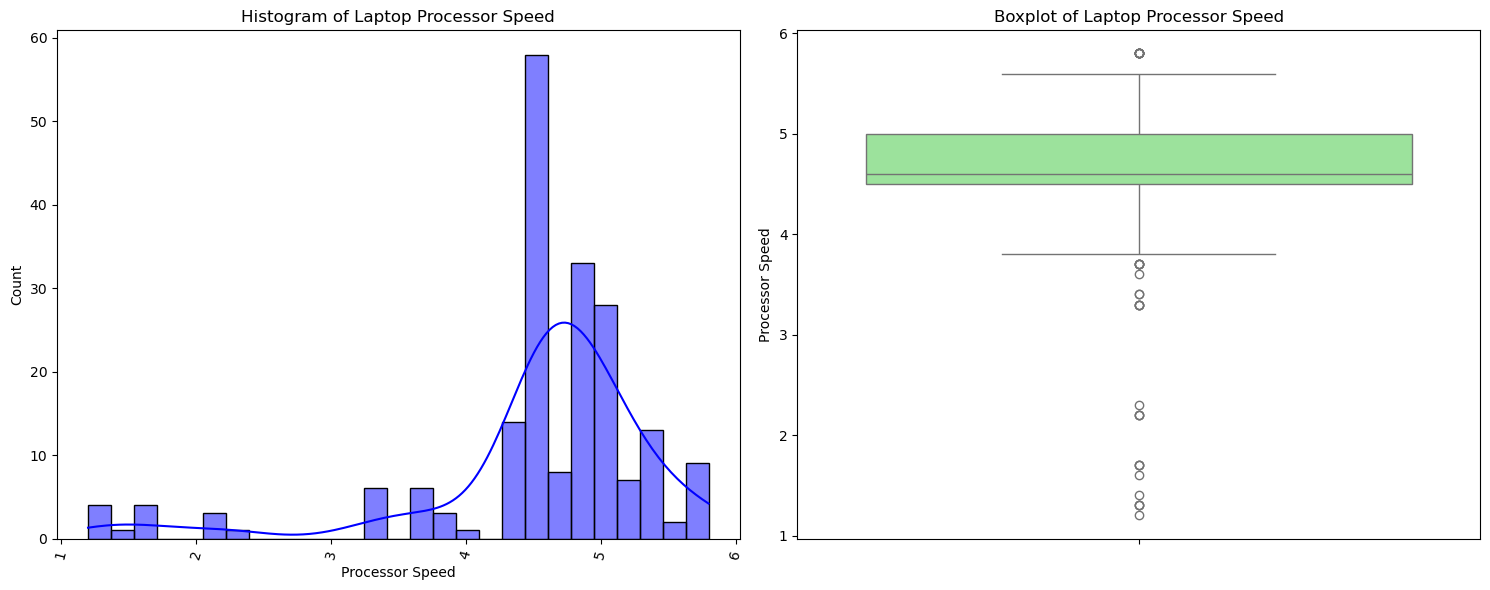

In [4431]:
# Ensure 'Processor Speed' is numeric, coerce errors to NaN if any non-numeric values exist
mega_pk_data['Processor Speed'] = pd.to_numeric(mega_pk_data['Processor Speed'], errors='coerce')

# Optionally, you can fill NaN values with the median before plotting if needed:
mega_pk_data['Processor Speed'].fillna(median_Processor_speed, inplace=True)



plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Processor Speed'], kde=True, color="blue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Processor Speed')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Processor Speed'], color="lightgreen")  # Add color to the boxplot
plt.title('Boxplot of Laptop Processor Speed')

plt.tight_layout()
plt.show()


In [4432]:
mega_pk_data['Processor Speed'].unique()


array([5.1 , 4.9 , 4.6 , 2.2 , 5.4 , 5.8 , 5.2 , 5.6 , 4.55, 4.5 , 5.  ,
       4.8 , 1.2 , 1.4 , 2.3 , 4.4 , 4.7 , 1.3 , 3.8 , 4.3 , 4.  , 3.3 ,
       3.4 , 3.7 , 3.6 , 1.7 , 1.6 ])

> ##  Installed RAM

In [4433]:
mega_pk_data['Installed RAM'].unique()

array(['16GB', '32GB', '64GB', '8GB', '4GB', '16 GB',
       '16GB SO-DIMM DDR5-5600', '24GB'], dtype=object)

In [4434]:
mega_pk_data['Installed RAM'].isnull().sum()

0

In [4435]:
mega_pk_data['Installed RAM'] = mega_pk_data['Installed RAM'].astype(str).str.extract(r'(\d+)').astype(int)  # Extract numbers and convert to float
mega_pk_data['Installed RAM']

0      16
1      16
2      16
3      16
4      32
       ..
196    32
197    32
198    64
199    16
200    64
Name: Installed RAM, Length: 201, dtype: int64

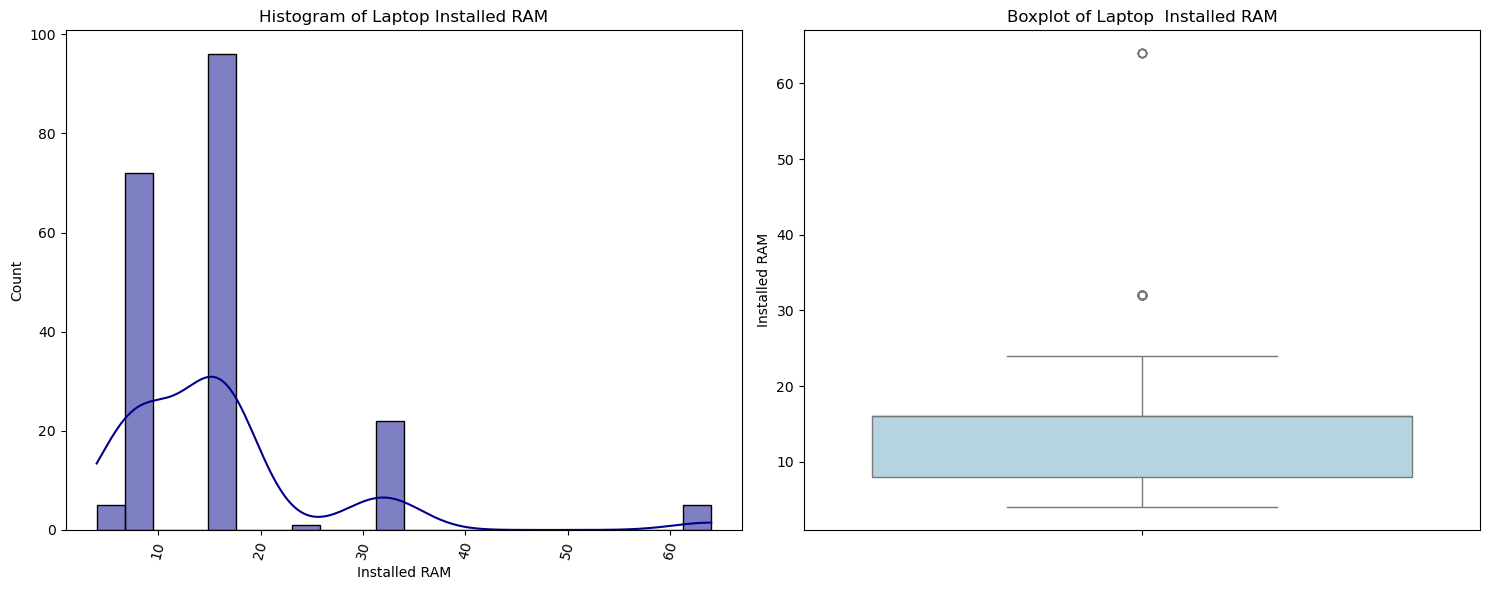

In [4436]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Installed RAM'], kde=True, color="darkblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Installed RAM')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Installed RAM'], color="lightblue")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Installed RAM')

plt.tight_layout()
plt.show()


> ##  SSD

In [4437]:
mega_pk_data['Storage Capacity'].unique()

array(['512GB SSD', '1TB SSD', '2TB SSD', '1 TB SSD', '1 TB', '2 TB SSD',
       '1TB', '2 TB', '512GB', '1TB PCIe 4.0', '1TB PCIEG4', '256GB SSD',
       '256GB', '512 GB'], dtype=object)

In [4438]:
mega_pk_data['Storage Capacity'].isnull().sum()

0

In [4439]:
mega_pk_data['Storage Capacity'] = mega_pk_data['Storage Capacity'].astype(str).str.extract(r'(\d+)').astype(int)  # Extract numbers and convert to float
mega_pk_data['Storage Capacity'] = mega_pk_data['Storage Capacity'].apply(lambda x:x * 1024 if x < 256 else x)
mega_pk_data['Storage Capacity'] 

0       512
1       512
2       512
3       512
4      1024
       ... 
196    1024
197     512
198    1024
199     512
200    1024
Name: Storage Capacity, Length: 201, dtype: int64

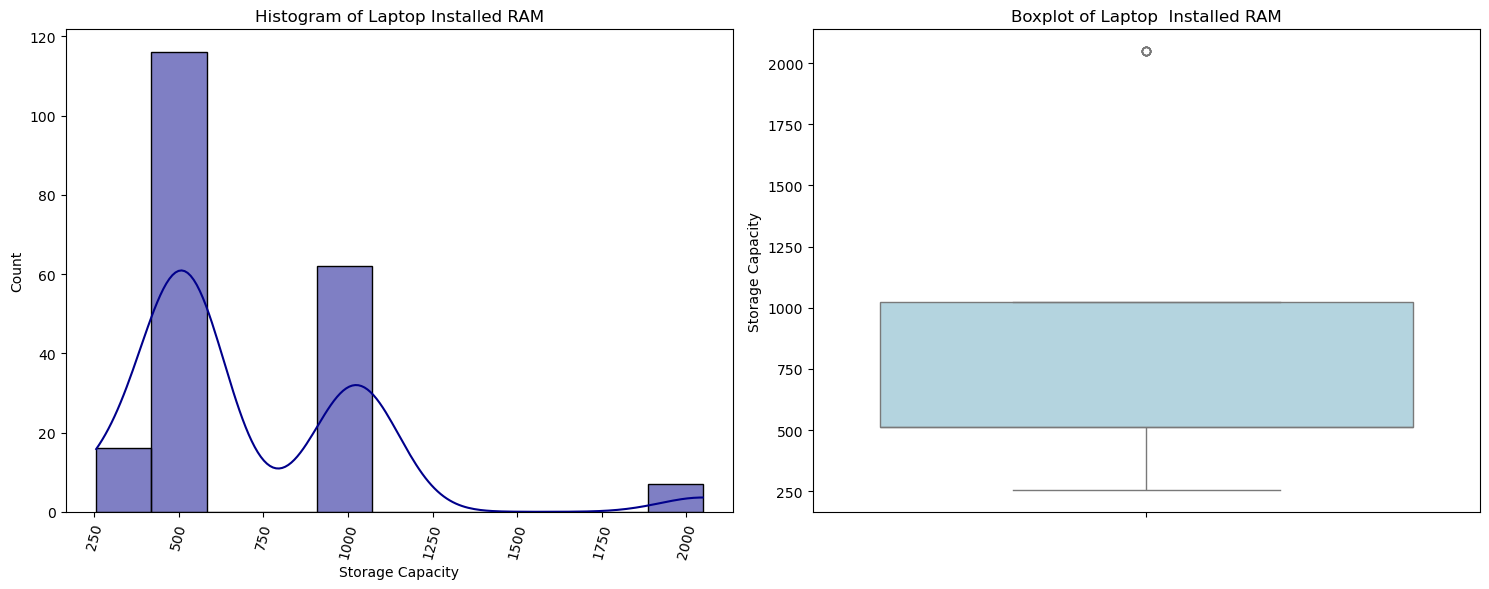

In [4440]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Storage Capacity'], kde=True, color="darkblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Installed RAM')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Storage Capacity'], color="lightblue")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Installed RAM')

plt.tight_layout()
plt.show()


> ##  Graphics memory

In [4441]:
mega_pk_data['Graphics memory'].unique()
# why this project 
# alternative approach
# meaning full
# what i did what i didnot do

array(['6GB NVIDIA GeForce RTX 4050', '8GB NVIDIA GeForce RTX 4060',
       '8GB Nvidia RTX 4060 GDDR6', '12GB NVIDIA GeForce RTX 4080 GDDR6',
       '16GB NVIDIA GeForce RTX 4090 GDDR6', '8GB Nvidia RTX 4070 GDDR6',
       'NVIDIA RTX 3050 6GB', '8GB NVIDIA GeForce RTX4070',
       '8GB NVIDIA GeForce RTX4060', '8GB NVIDIA GeForce RTX 4060 GDDR6',
       '12GB NVIDIA GeForce RTX4080', '4GB Nvidia RTX 3050 GDDR6',
       '6GB Nvidia RTX 4050 GDDR6', '4GB NVIDIA RTX3050',
       '6GB NVIDIA GeForce RTX 3050', 'Intel Arc Graphics',
       'Intel Iris Xe Graphics', nan, 'AMD Radeon Graphics',
       '8GB NVIDIA GeForce RTX 4070 GDDR6', 'SSD', 'Intel UHD Graphics',
       '2GB NVIDIA GeForce MX550 GDDR6',
       '2 GB NVIDIA GeForce MX570 A GDDR6', 'Intel Graphics',
       'Intel Integrated Graphics', '4GB NVIDIA GeForce RTX 2050',
       'Intel ARC Graphics', '6 GB NVIDIA GeForce RTX 3050 GDDR6',
       '8GB NVIDIA GeForece RTX 4060 GDDR6 GC',
       '4GB Nvidia RTX 2050 GDDR6', '8 GB NVI

In [4442]:
print(mega_pk_data['Graphics memory'].isnull().sum())
null_values = mega_pk_data['Graphics memory'].isnull()

print("Null Values Count",mega_pk_data[null_values])

4
Null Values Count       Price Brand  Processor Speed  Installed RAM  Storage Capacity  \
35   194999  Asus              4.6              8               512   
36   279999  Asus              4.6             16              1024   
119  100000    Hp              4.8             16               512   
121  451999    Hp              4.8             32              2048   

    Graphics memory                         Screen resolution Touchscreen  \
35              NaN  12.29 inches x 8.66 inches x 0.59 inches     1.27 kg   
36              NaN  12.29 inches x 8.66 inches x 0.59 inches     1.27 kg   
119             NaN                    12.35 x 8.68 x 0.67 in     1.45 kg   
121             NaN                    12.35 x 8.68 x 0.67 in     1.45 kg   

    Weight Fingerprint Reader Backlit keyboard  LAN    Processor Type  \
35     Yes                Yes              NaN  Yes  Intel Core Ultra   
36     Yes                Yes              NaN  Yes  Intel Core Ultra   
119    Yes         

In [4443]:
mega_pk_data['Graphics memory'] = mega_pk_data['Graphics memory'].fillna('Unknown')

print(mega_pk_data['Graphics memory'].isnull().sum())


0


In [4444]:
def extract_GPUs(text):
    if isinstance(text, str):
        match = re.search(r'\d+\s?GB', text, re.IGNORECASE)
        if match:
    
            cleaned_GPUs = re.sub(r'\d+\s?GB', '', text) 
            return cleaned_GPUs.strip() 
    return text

mega_pk_data['Graphics memory'] = mega_pk_data['Graphics memory'].apply(extract_GPUs)


print(mega_pk_data['Graphics memory'].head(25))


0           NVIDIA GeForce RTX 4050
1           NVIDIA GeForce RTX 4060
2             Nvidia RTX 4060 GDDR6
3             Nvidia RTX 4060 GDDR6
4     NVIDIA GeForce RTX 4080 GDDR6
5     NVIDIA GeForce RTX 4090 GDDR6
6             Nvidia RTX 4060 GDDR6
7             Nvidia RTX 4070 GDDR6
8             Nvidia RTX 4060 GDDR6
9             Nvidia RTX 4060 GDDR6
10                  NVIDIA RTX 3050
11                  NVIDIA RTX 3050
12           NVIDIA GeForce RTX4070
13           NVIDIA GeForce RTX4060
14           NVIDIA GeForce RTX4060
15           NVIDIA GeForce RTX4060
16    NVIDIA GeForce RTX 4060 GDDR6
17           NVIDIA GeForce RTX4080
18           NVIDIA GeForce RTX4070
19          NVIDIA GeForce RTX 4060
20           NVIDIA GeForce RTX4060
21            Nvidia RTX 3050 GDDR6
22            Nvidia RTX 4050 GDDR6
23    NVIDIA GeForce RTX 4060 GDDR6
24    NVIDIA GeForce RTX 4060 GDDR6
Name: Graphics memory, dtype: object


<Axes: ylabel='Graphics memory'>

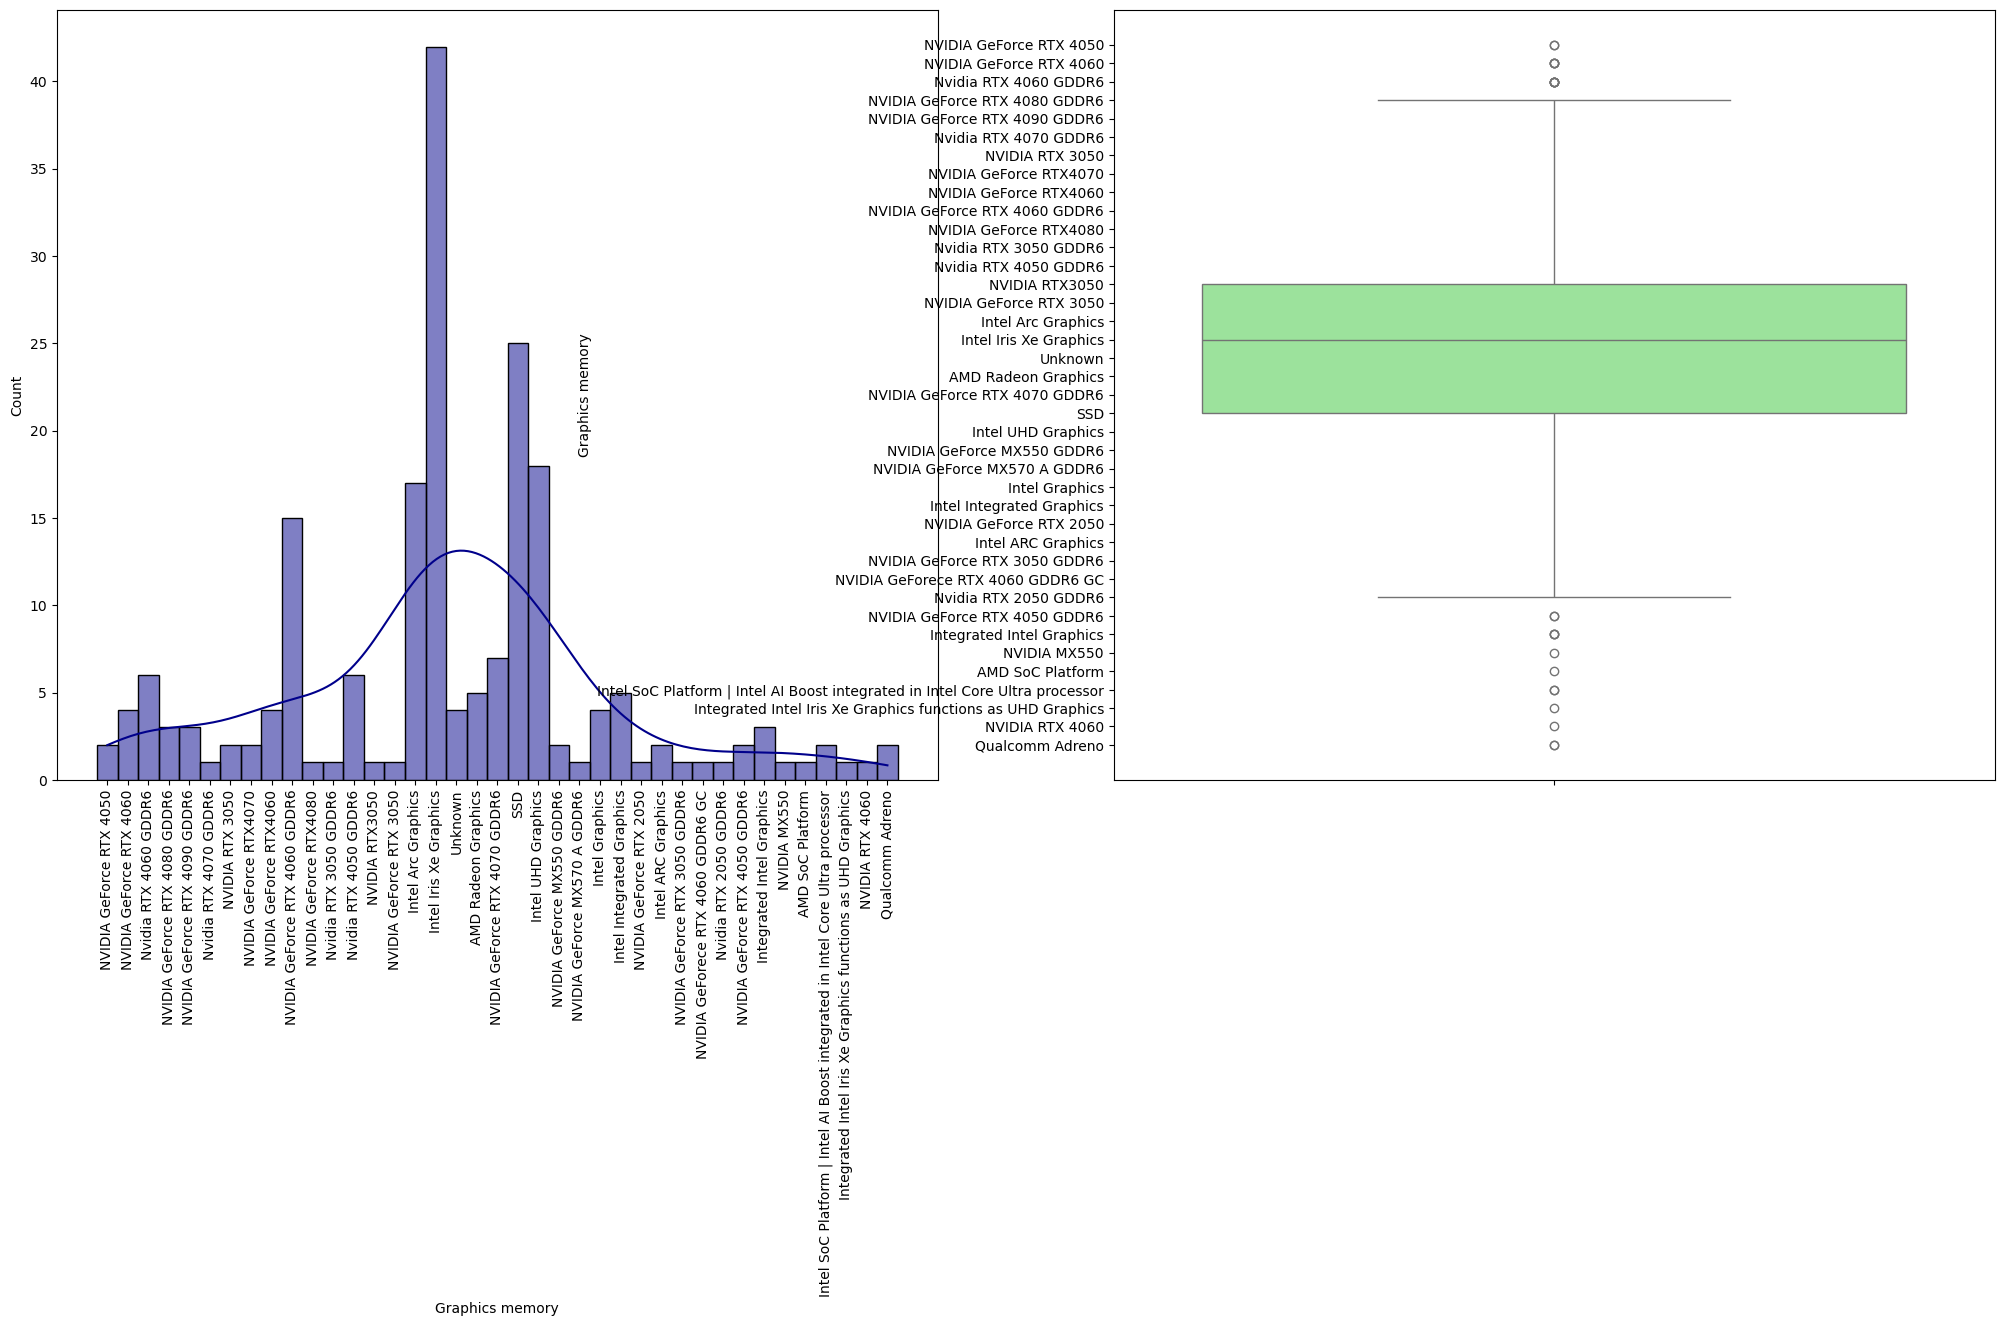

In [4445]:
plt.figure(figsize=(25,10))


plt.subplot(1, 2, 1)
sns.histplot( mega_pk_data['Graphics memory'], kde=True, color="darkblue",  edgecolor="black", ) 
plt.xticks(rotation=90, ha='center' ,fontsize=10)  


plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Graphics memory'],color= "lightgreen")


## column must be re-aligned first from Screen resolution to LAN


In [4446]:
mega_pk_data

,Price,Brand,Processor Speed,Installed RAM,Storage Capacity,Graphics memory,Screen resolution,Touchscreen,Weight,Fingerprint Reader,Backlit keyboard,LAN,Processor Type,Processor Generation
0,294999,Acer,5.1,16,512,NVIDIA GeForce RTX 4050,16 Inches,No,2.44 kg,No,Yes,Yes,AMD RYZEN 7,RYZEN 7
1,329999,Acer,5.1,16,512,NVIDIA GeForce RTX 4060,16 Inches,No,2.44 kg,No,Yes,Yes,AMD RYZEN 7,RYZEN 7
2,319999,Acer,4.9,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,2.11 kg,No,Yes,Yes,Core i7,13th Generation
3,339999,Acer,4.6,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,2.11 kg,No,Yes,Yes,Core i9,13th Generation
4,699999,Acer,2.2,32,1024,NVIDIA GeForce RTX 4080 GDDR6,2560x1600,No,2.5kg,No,Yes,Yes,Core i9,14th Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,576999,Surface,4.6,32,1024,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,1.68 kg kg,Yes,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
197,463999,Surface,4.6,32,512,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,1.68 kg kg,Yes,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
198,664999,Surface,4.6,64,1024,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,1.68 kg kg,Yes,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
199,495000,Surface,4.6,16,512,Qualcomm Adreno,2304 x 1536,Yes,1.36 kg,No,Yes,NaN,Snapdragon,X Elite


In [4447]:
def move_and_replace(df, touchscreen_col, weight_col):

    for idx, row in df.iterrows():
        touchscreen_value = row[touchscreen_col]
        
        if isinstance(touchscreen_value, str) and 'kg' in touchscreen_value:
            weight_value = float(touchscreen_value.replace('kg', '').strip())
            df.at[idx, weight_col] = weight_value
            df.at[idx, touchscreen_col] = np.nan  

    return df

mega_pk_data = move_and_replace(mega_pk_data, 'Touchscreen', 'Weight')

mega_pk_data

,Price,Brand,Processor Speed,Installed RAM,Storage Capacity,Graphics memory,Screen resolution,Touchscreen,Weight,Fingerprint Reader,Backlit keyboard,LAN,Processor Type,Processor Generation
0,294999,Acer,5.1,16,512,NVIDIA GeForce RTX 4050,16 Inches,No,2.44 kg,No,Yes,Yes,AMD RYZEN 7,RYZEN 7
1,329999,Acer,5.1,16,512,NVIDIA GeForce RTX 4060,16 Inches,No,2.44 kg,No,Yes,Yes,AMD RYZEN 7,RYZEN 7
2,319999,Acer,4.9,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,2.11 kg,No,Yes,Yes,Core i7,13th Generation
3,339999,Acer,4.6,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,2.11 kg,No,Yes,Yes,Core i9,13th Generation
4,699999,Acer,2.2,32,1024,NVIDIA GeForce RTX 4080 GDDR6,2560x1600,No,2.5kg,No,Yes,Yes,Core i9,14th Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,576999,Surface,4.6,32,1024,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,NaN,1.68,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
197,463999,Surface,4.6,32,512,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,NaN,1.68,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
198,664999,Surface,4.6,64,1024,Intel Arc Graphics,340 mm x 244 mm x 16.9 mm,NaN,1.68,Yes,NaN,Yes,Intel Core Ultra,Ultra 7
199,495000,Surface,4.6,16,512,Qualcomm Adreno,2304 x 1536,Yes,1.36 kg,No,Yes,NaN,Snapdragon,X Elite


> ##  Screen resolution

In [4448]:
mega_pk_data['Screen resolution'].unique()

array(['16 Inches', '1920x1080', '2560x1600', '2880x1620', '2560 x 1600',
       '1920 x 1200', '2560 x 1440', '1920 x 1080', '1920x1200',
       '2880 x 1620', '35.36 x 24.69 x 1.39 ~ 1.59 cm',
       '35.97 x 23.25 x 1.79 ~ 1.79 cm',
       '12.29 inches x 8.66 inches x 0.59 inches', '29.62cm x 1.09',
       '31.35 x 21.79 x 1.46 ~ 1.99 cm', nan, '31.30 x 22.27 x 1.82 cm',
       '14.11 x 0.83 x 9.27 Inch', 'Height : 15.3 mm (0.60',
       '35.98 x 23.6 x 1.86 cm', '16:9', '35.85 x 24.2 x 1.79 cm',
       '36 x 23.6 x 1.86 cm (14.17 x 9.29 x 0.73 in)', '16:10',
       '31.86 x 22.44 x 1.09 cm (front) 31.86 x 22.43 x 1.7 cm (rear)',
       '14.14 x 9.2 x 0.78 in',
       '35.94 x 25.11 x 1.09 cm (front) 35.94 x 25.11 x 1.7 cm (rear)',
       '29.8 x 22.04 x 1.69 cm', '12.35 x 8.68 x 0.67 in',
       '14.05 x 9.67 x 0.78 in', '12.32 x 0.69 x 8.85 inch',
       '0.69 x 8.85 x 12.32 Inches',
       '359.2 x 236.5 x 19.9 mm (14.14 x 9.31 x 0.78 inches)',
       '313.5 x 224 x 16.9 mm', '3

In [4449]:
mega_pk_data['Screen resolution'].isnull().sum()


47

In [4450]:
print(mega_pk_data['Screen resolution'].isnull().sum())
null_values = mega_pk_data['Screen resolution'].isnull()
print("Null Values Count",mega_pk_data[null_values])

47
Null Values Count       Price   Brand  Processor Speed  Installed RAM  Storage Capacity  \
42   859999    Dell              5.4             32              1024   
46   169999    Dell              4.6              8              1024   
47   159999    Dell              4.6              8               512   
48   354999    Dell              5.0              8               512   
49   232999    Dell              4.4             16               256   
50   166999    Dell              4.4              8               256   
51   167999    Dell              4.6              8               256   
52   254999    Dell              5.0              8               512   
54   104999    Dell              4.4              8               512   
55   133999    Dell              4.4              8               512   
56   164999    Dell              4.7              8               512   
57   144999    Dell              1.3             16               512   
60   404999    Dell           

In [4451]:
mega_pk_data['Screen resolution'] = mega_pk_data['Screen resolution'].fillna(0)

In [4452]:
def extract_GPUs(text):
    if isinstance(text, str):

        cleaned_GPUs = re.sub(r'\s*(cm|inches?|mm|in|front|rear|Height|ch|es|~|\s*\(.*\)|\d\*\()\s*', '', text.strip(),flags=re.IGNORECASE)
        cleaned_GPUs = re.sub(r'\s*\(.*\)', '', cleaned_GPUs)
        
        cleaned_GPUs = re.sub(r'\s*x\s*', 'x', cleaned_GPUs)

        return cleaned_GPUs.strip() 
    return text

mega_pk_data['Screen resolution'] = mega_pk_data['Screen resolution'].apply(extract_GPUs)

mega_pk_data['Screen resolution']


0                16
1                16
2         1920x1080
3         1920x1080
4         2560x1600
           ...     
196    340x244x16.9
197    340x244x16.9
198    340x244x16.9
199       2304x1536
200       2304x1536
Name: Screen resolution, Length: 201, dtype: object

In [4453]:
mega_pk_data['Screen resolution'] = mega_pk_data['Screen resolution'].astype(str) 

mega_pk_data['Screen resolution'].unique()



array(['16', '1920x1080', '2560x1600', '2880x1620', '1920x1200',
       '2560x1440', '35.36x24.69x1.391.59', '35.97x23.25x1.791.79',
       '12.29x8.66x0.59', '29.62x1.09', '31.35x21.79x1.461.99', '0',
       '31.30x22.27x1.82', '14.11x0.83x9.27', ': 15.3(0.60',
       '35.98x23.6x1.86', '16:9', '35.85x24.2x1.79', '36x23.6x1.86',
       '16:10', '31.86x22.44x1.09', '14.14x9.2x0.78', '35.94x25.11x1.09',
       '29.8x22.04x1.69', '12.35x8.68x0.67', '14.05x9.67x0.78',
       '12.32x0.69x8.85', '0.69x8.85x12.32', '359.2x236.5x19.9',
       '313.5x224x16.9', '356x253.5x17.5', '14.01x9.98x0.69',
       '12.76x8.69x0.7', '18.73x325.4x217', '0.70x12.51x8.93',
       '12.44x8.81x0.7', '14.25x10.06x0.81', '312.8x14.96x214.75',
       '11.88x8.45x0.65', '359.2x235.8x19.9', '12.51x0.66x8.75',
       '318x230x15.25', '3200x2000', '3840x2400', '2880x1800',
       '340x244x16.9', '308x223x16.7', '2304x1536'], dtype=object)

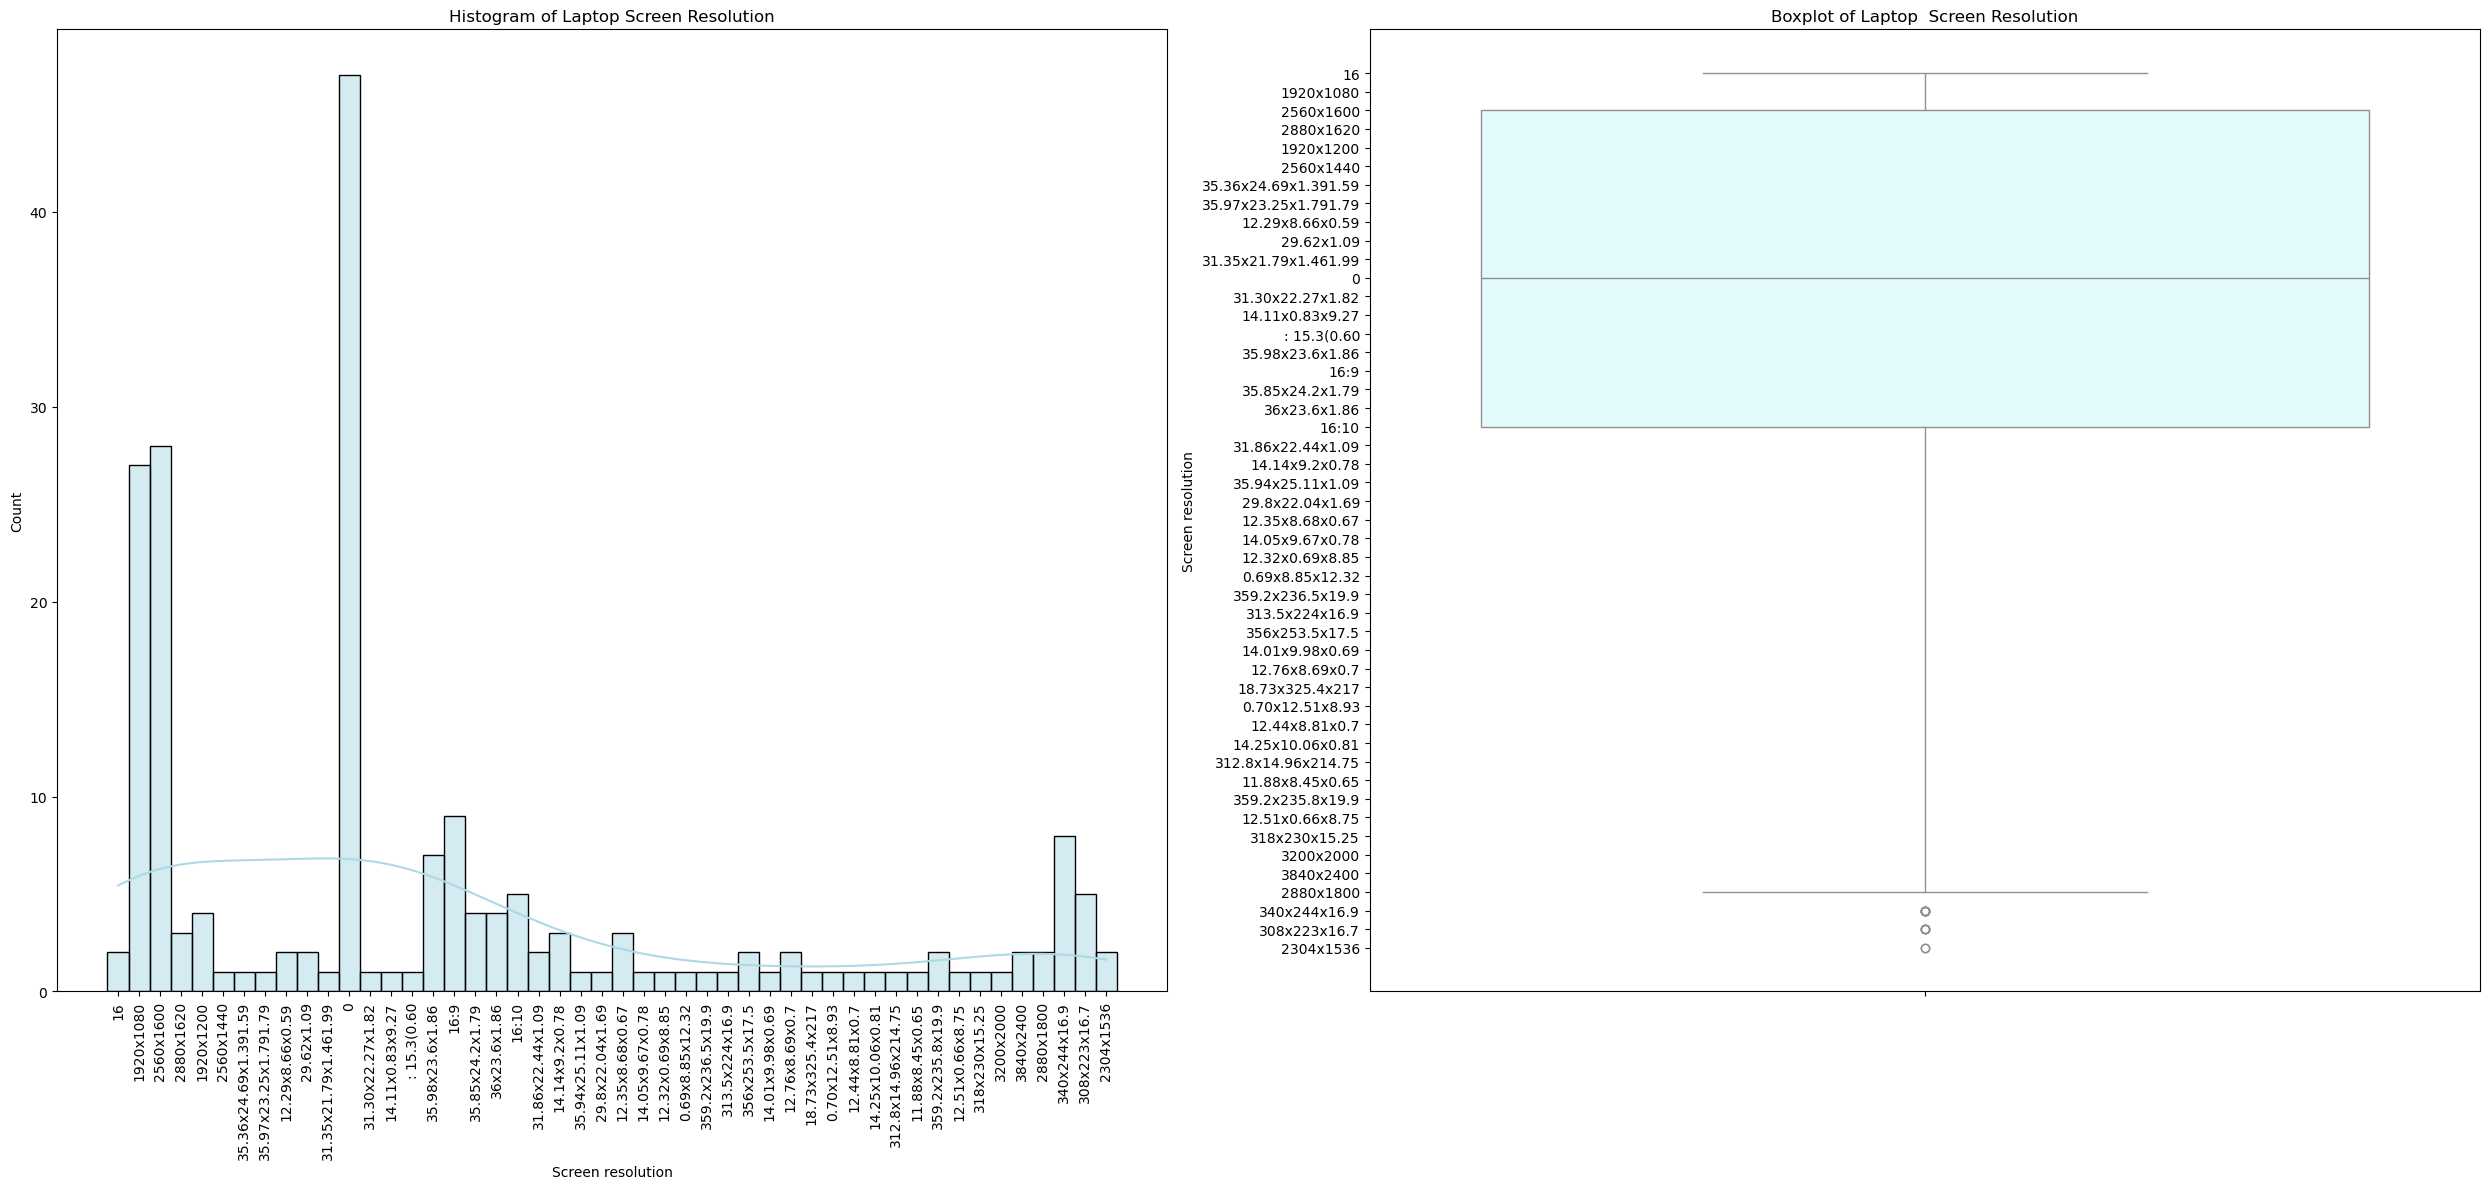

In [4454]:
plt.figure(figsize=(25, 12))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Screen resolution'], kde=True, color="lightblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=90, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Screen Resolution')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Screen resolution'], color="lightCyan")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Screen Resolution')

plt.tight_layout()
plt.show()

> ##  Touchscreen

In [4455]:
mega_pk_data['Touchscreen'].unique()


array(['No', nan, 'Led', '14 inches', '1.33 KG', '14.5 Inch', '15.6 inch',
       '15.6 INCHES', '15.6 Inches', '15.6 Inch', '14 INCHES', '1.87 Kg',
       'Yes', '14 Inches', '16 Inches'], dtype=object)

In [4456]:
yes_count = mega_pk_data[mega_pk_data['Touchscreen'] == 'Yes'].shape[0]
no_count = mega_pk_data[mega_pk_data['Touchscreen'] == 'No'].shape[0]


print(f"Number of 'Yes' conditions: {yes_count}")
print(f"Number of 'No' conditions: {no_count}")


Number of 'Yes' conditions: 7
Number of 'No' conditions: 61


In [4457]:
mega_pk_data['Touchscreen'].isnull().sum()


106

In [4458]:
mega_pk_data['Touchscreen']=mega_pk_data['Touchscreen'].replace(to_replace=('Led','14 inches','1.33 KG','14.5 Inch','15.6 inch','15.6 INCHES','15.6 Inches','15.6 Inch'
                                                                            ,'14 INCHES','1.87 Kg','14 Inches','16 Inches'),value="Yes")


In [4459]:
mega_pk_data['Touchscreen'] = mega_pk_data['Touchscreen'].fillna("No") 


yes_count = mega_pk_data[mega_pk_data['Touchscreen'] == 'Yes'].shape[0]
no_count = mega_pk_data[mega_pk_data['Touchscreen'] == 'No'].shape[0]


print(f"Number of 'Yes' conditions: {yes_count}")
print(f"Number of 'No' conditions: {no_count}")

Number of 'Yes' conditions: 34
Number of 'No' conditions: 167


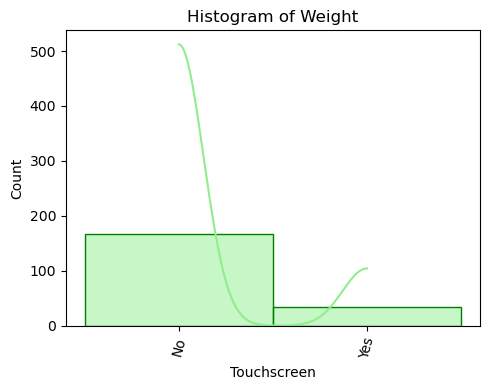

In [4460]:
plt.figure(figsize=(5, 4))


sns.histplot(mega_pk_data['Touchscreen'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')




plt.tight_layout()
plt.show()

> ##  Weight

In [4461]:
mega_pk_data['Weight'].unique()


array(['2.44 kg', '2.11 kg', '2.5kg', '3.2kg', '2.7 kg', '1.80 kg',
       '2.50 kg', '2.79 kg', '3.00 Kg', '2.30 Kg', '2.20 Kg', '2.27 Kg',
       '2.60 Kg', '1.90 kg', 1.5, 1.7, 1.27, 1.65, '1.021 kg',
       '16 Inches', '2.81 kg', '2.87 kg', 1.531, 1.63, 1.36, nan, 1.59,
       1.613, 'Yes', 1.66, 1.94, 1.17, '1.59 kg', 1.69, 1.52, '2.3kg',
       1.78, 1.39, '1.78 kg', 1.74, 1.45, 1.95, '2.29 kg', '2.29 KG',
       '15.6 INCHES', 1.54, 1.62, '2.36 kg', '2.55 kg', '2.62 kg',
       '2.4 kg', '2.6 kg', 1.38, '1.70kg', 1.64, 1.43, 1.4, 1.81, 1.478,
       1.32, 1.68, 1.25, 1.61, 1.99, 1.34, '2 kg', '2.75 kg', '1.99 kg',
       '1.85 kg', '1.36 kg'], dtype=object)

In [4462]:
mega_pk_data['Weight'].isnull().sum()


28

In [4463]:
mega_pk_data['Weight']=mega_pk_data['Weight'].fillna(0)

In [4464]:
mega_pk_data['Weight'].isnull().sum()


0

In [4465]:

def extract_floets_point_Processor_speed(text):
    if isinstance(text, str):  # Ensure it's a string
        match = re.search(r'(\d+\.\d+|\d+)', text)  
        if match:
            return match.group()  
    return text  # Return the original value if no match is found or not a string

# Example usage
mega_pk_data['Weight'] = mega_pk_data['Weight'].apply(extract_floets_point_Processor_speed)
mega_pk_data['Weight'].head(30)

0     2.44
1     2.44
2     2.11
3     2.11
4      2.5
5      3.2
6      2.7
7      2.7
8      2.7
9      2.7
10    1.80
11    1.80
12    2.50
13    2.50
14    2.50
15    2.50
16    2.79
17    3.00
18    3.00
19    3.00
20    3.00
21    2.30
22    2.20
23    2.20
24    2.20
25    2.30
26    2.27
27    2.60
28    1.80
29    1.80
Name: Weight, dtype: object

In [4466]:
mega_pk_data['Weight'].unique()


array(['2.44', '2.11', '2.5', '3.2', '2.7', '1.80', '2.50', '2.79',
       '3.00', '2.30', '2.20', '2.27', '2.60', '1.90', 1.5, 1.7, 1.27,
       1.65, '1.021', '16', '2.81', '2.87', 1.531, 1.63, 1.36, 0, 1.59,
       1.613, 'Yes', 1.66, 1.94, 1.17, '1.59', 1.69, 1.52, '2.3', 1.78,
       1.39, '1.78', 1.74, 1.45, 1.95, '2.29', '15.6', 1.54, 1.62, '2.36',
       '2.55', '2.62', '2.4', '2.6', 1.38, '1.70', 1.64, 1.43, 1.4, 1.81,
       1.478, 1.32, 1.68, 1.25, 1.61, 1.99, 1.34, '2', '2.75', '1.99',
       '1.85', '1.36'], dtype=object)

In [4467]:
mega_pk_data['Weight'] = mega_pk_data['Weight'].replace("Yes",0)
mega_pk_data['Weight'].unique()


array(['2.44', '2.11', '2.5', '3.2', '2.7', '1.80', '2.50', '2.79',
       '3.00', '2.30', '2.20', '2.27', '2.60', '1.90', 1.5, 1.7, 1.27,
       1.65, '1.021', '16', '2.81', '2.87', 1.531, 1.63, 1.36, 0, 1.59,
       1.613, 1.66, 1.94, 1.17, '1.59', 1.69, 1.52, '2.3', 1.78, 1.39,
       '1.78', 1.74, 1.45, 1.95, '2.29', '15.6', 1.54, 1.62, '2.36',
       '2.55', '2.62', '2.4', '2.6', 1.38, '1.70', 1.64, 1.43, 1.4, 1.81,
       1.478, 1.32, 1.68, 1.25, 1.61, 1.99, 1.34, '2', '2.75', '1.99',
       '1.85', '1.36'], dtype=object)

### had to fix 0 values to avoid bias in coming preprocessing 
now i converted it to numeric if not then take sum and devided by all values then replace with zero and then make it take only 2 values after point

In [4468]:
mega_pk_data['Weight'] =pd.to_numeric(mega_pk_data['Weight'],errors='coerce')

Avg_weight = (mega_pk_data['Weight'].sum() / 201)

mega_pk_data['Weight'] =mega_pk_data['Weight'].replace(0,Avg_weight)
mega_pk_data['Weight'] =mega_pk_data['Weight'].round(2)


In [4469]:
mega_pk_data['Weight'] = mega_pk_data['Weight'].astype(str) 

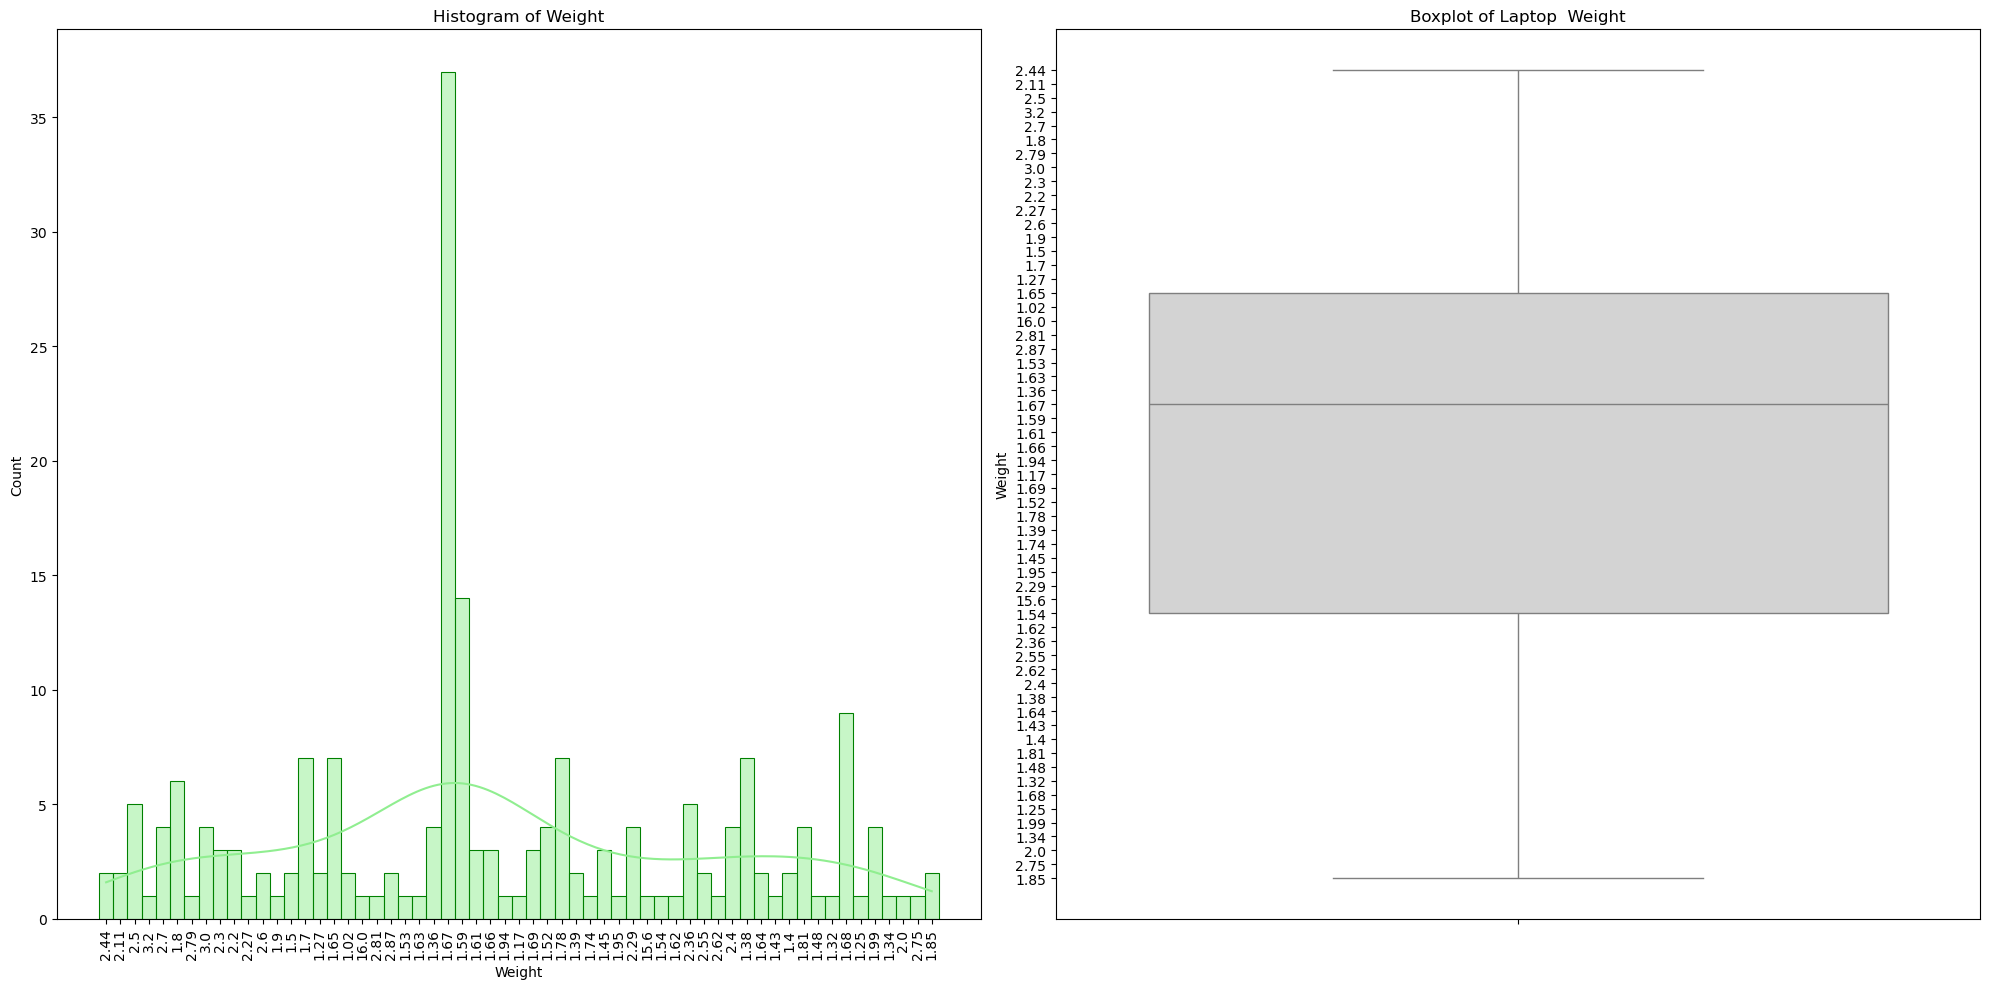

In [4470]:
plt.figure(figsize=(20, 10))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Weight'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=90, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')


# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Weight'], color="lightGray")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Weight')

plt.tight_layout()
plt.show()

> ##  Fingerprint Reader

In [4471]:
mega_pk_data['Fingerprint Reader'].unique()


array(['No', 'Yes', nan, '2560 x 1600', 'Black', 'Graphite',
       'Natural silver', 'Silver', 'Warm Gold', 'Pike Silver Aluminum',
       'Natural Silver', 'Pike Silver', '1920 x 1080', 'Arctic Grey',
       'Grey', 'Storm Grey'], dtype=object)

In [4472]:
mega_pk_data['Fingerprint Reader'].isnull().sum()


27

In [4473]:

# Assuming the column with fingerprint reader data is called 'Fingerprint Reader'
# Filter the 'Yes' and 'No' values for the fingerprint reader
fingerprint_reader = mega_pk_data['Fingerprint Reader'][mega_pk_data['Fingerprint Reader'].isin(['Yes', 'No'])].reset_index(drop=True)

# Extract the color values (assuming the rest are colors, excluding 'Yes', 'No', and resolution values)
colors = mega_pk_data['Fingerprint Reader'][~mega_pk_data['Fingerprint Reader'].isin(['Yes', 'No', '2560 x 1600', '1920 x 1080'])].reset_index(drop=True)

# Make sure both columns have the same length by truncating or filling as needed
min_length = min(len(fingerprint_reader), len(colors))  # Adjust to the minimum length
fingerprint_reader = fingerprint_reader[:min_length]
colors = colors[:min_length]

# Add the new columns to the original DataFrame
mega_pk_data['Fingerprint Reader'] = fingerprint_reader
mega_pk_data['Color'] = colors

mega_pk_data['Fingerprint Reader'] =mega_pk_data['Fingerprint Reader'].fillna('No') 

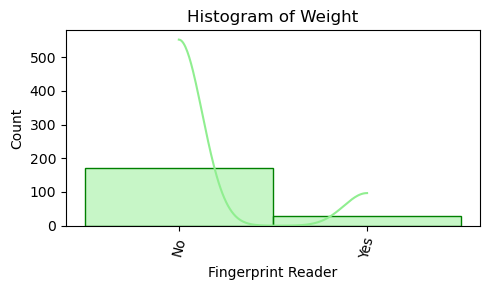

In [4474]:
plt.figure(figsize=(5, 3))

sns.histplot(mega_pk_data['Fingerprint Reader'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')


plt.tight_layout()
plt.show()

> ##  Backlit Keyboard

In [4475]:
mega_pk_data['Backlit keyboard'].unique()


array(['Yes', 'No', nan, '1.36 kg', '1 RJ45 Ethernet port (flip-down)',
       '1 x RJ45', '1.74 kg', '1.59 kg', '1.7 kg', '1.78 kg', '1.51 kg',
       '100/1000M (RJ-45)', '100/1000M', '1.44 kg', '1.61kg'],
      dtype=object)

In [4476]:
mega_pk_data['Backlit keyboard'].isnull().sum()


52

In [4477]:
# Replace missing values (nan) with 'No'
mega_pk_data['Backlit keyboard'] = mega_pk_data['Backlit keyboard'].fillna('No')

# Replace specific values (e.g., '1.36 kg', '1 RJ45 Ethernet port', etc.)
mega_pk_data['Backlit keyboard'] = mega_pk_data['Backlit keyboard'].replace(
    ['1.36 kg', '1 RJ45 Ethernet port (flip-down)', '1 x RJ45','100/1000M (RJ-45)','1.74 kg',
     '1.59 kg','1.7 kg','1.78 kg','1.51 kg','1.7 kg','100/1000M','1.44 kg','1.61kg'], 'No'
)


In [4478]:
mega_pk_data['Backlit keyboard'].unique()


array(['Yes', 'No'], dtype=object)

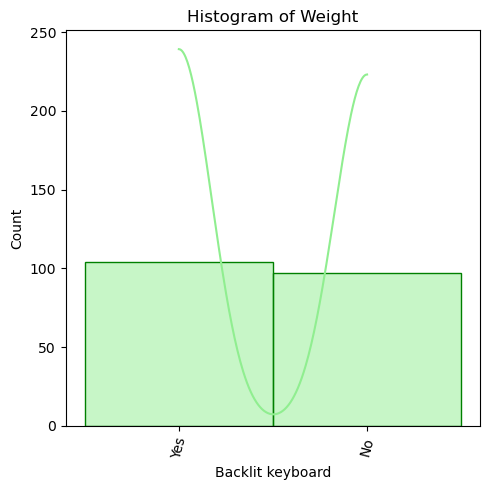

In [4479]:
plt.figure(figsize=(5, 5))

# First subplot: Histogram with KDE and styling

sns.histplot(mega_pk_data['Backlit keyboard'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')



plt.tight_layout()
plt.show()

> ##  LAN

In [4480]:
mega_pk_data['LAN'].unique()


array(['Yes', nan, 'No', '35.79 x 25.5 x 2.35 cm'], dtype=object)

In [4481]:
mega_pk_data['LAN'].isnull().sum()


15

In [4482]:
mega_pk_data['LAN'] = mega_pk_data['LAN'].replace(['nan', '35.79 x 25.5 x 2.35 cm'], 'No').fillna('No')

In [4483]:
yes_count = mega_pk_data[mega_pk_data['LAN'] == 'Yes'].shape[0]
no_count = mega_pk_data[mega_pk_data['LAN'] == 'No'].shape[0]


print(f"Number of 'Yes' conditions: {yes_count}")
print(f"Number of 'No' conditions: {no_count}")

Number of 'Yes' conditions: 170
Number of 'No' conditions: 31


In [4484]:
mega_pk_data['LAN'].unique()


array(['Yes', 'No'], dtype=object)

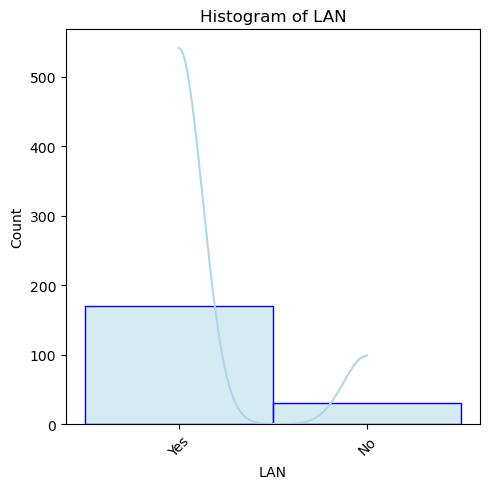

In [4485]:
plt.figure(figsize=(5, 5))

sns.histplot(mega_pk_data['LAN'], kde=True, color="lightblue",  edgecolor="blue" ) 
plt.xticks(rotation=45, ha='center', va='top', fontsize=10)  
plt.title('Histogram of LAN')

plt.tight_layout()
plt.show()

> ##  Color

In [4486]:
mega_pk_data['Color'].unique()

mega_pk_data['Color'] = mega_pk_data['Color'].fillna('Unknown')





In [4487]:

yes_count = mega_pk_data[mega_pk_data['Color'] == 'Unknown'].shape[0]
# no_count = mega_pk_data[mega_pk_data['LAN'] == 'No'].shape[0]


print(f"Number of 'Unknown' conditions: {yes_count}")
# print(f"Number of 'No' conditions: {no_count}")


Number of 'Unknown' conditions: 178


In [4488]:
mega_pk_data['Color'].unique()


array(['Unknown', 'Black', 'Graphite', 'Natural silver', 'Silver',
       'Warm Gold', 'Pike Silver Aluminum', 'Natural Silver',
       'Pike Silver', 'Arctic Grey', 'Grey', 'Storm Grey'], dtype=object)

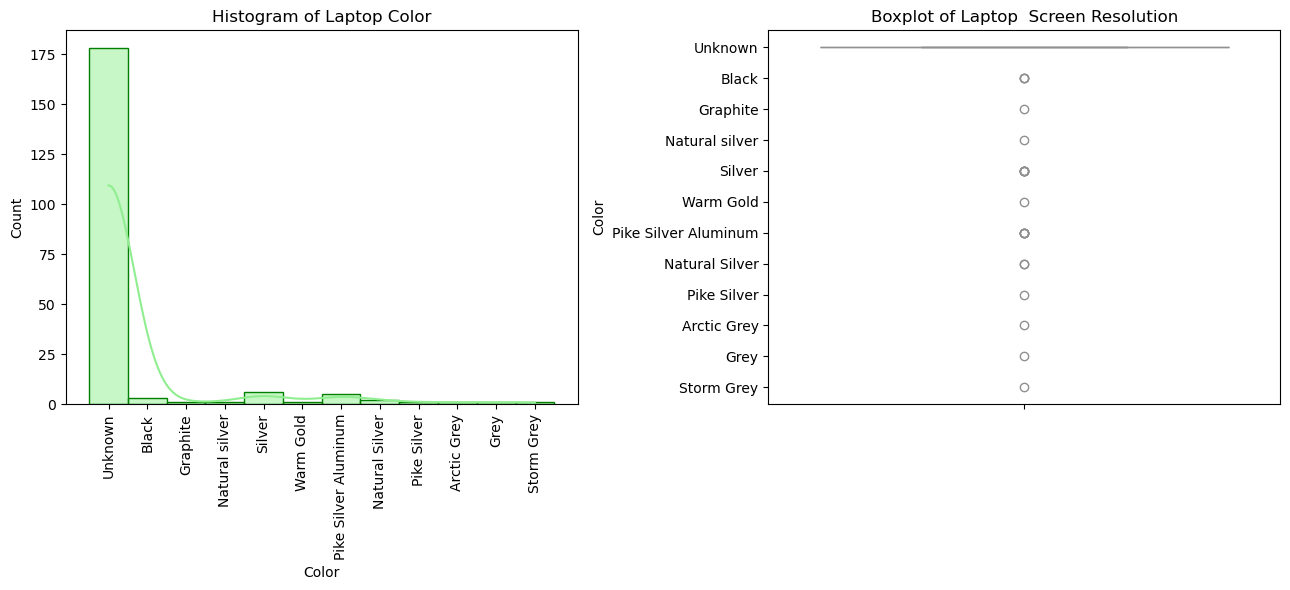

In [4489]:
plt.figure(figsize=(13, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(mega_pk_data['Color'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=90, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Color')


# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(mega_pk_data['Color'], color="lightCyan")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Screen Resolution')

plt.tight_layout()
plt.show()

In [4490]:
new_columns = ['Price', 'Brand', 'Processor Generation', 'Processor Type', 'Processor Speed', 'Installed RAM',
                'Storage Capacity', 'Graphics memory', 'Screen resolution', 'Touchscreen', 'Color', 'Weight', 'Fingerprint Reader', 'Backlit keyboard', 'LAN']
mega_pk_data =mega_pk_data[new_columns]
mega_pk_data

,Price,Brand,Processor Generation,Processor Type,Processor Speed,Installed RAM,Storage Capacity,Graphics memory,Screen resolution,Touchscreen,Color,Weight,Fingerprint Reader,Backlit keyboard,LAN
0,294999,Acer,RYZEN 7,AMD RYZEN 7,5.1,16,512,NVIDIA GeForce RTX 4050,16,No,Unknown,2.44,No,Yes,Yes
1,329999,Acer,RYZEN 7,AMD RYZEN 7,5.1,16,512,NVIDIA GeForce RTX 4060,16,No,Unknown,2.44,No,Yes,Yes
2,319999,Acer,13th Generation,Core i7,4.9,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,Unknown,2.11,No,Yes,Yes
3,339999,Acer,13th Generation,Core i9,4.6,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,Unknown,2.11,No,Yes,Yes
4,699999,Acer,14th Generation,Core i9,2.2,32,1024,NVIDIA GeForce RTX 4080 GDDR6,2560x1600,No,Unknown,2.5,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,576999,Surface,Ultra 7,Intel Core Ultra,4.6,32,1024,Intel Arc Graphics,340x244x16.9,No,Unknown,1.68,No,No,Yes
197,463999,Surface,Ultra 7,Intel Core Ultra,4.6,32,512,Intel Arc Graphics,340x244x16.9,No,Unknown,1.68,No,No,Yes
198,664999,Surface,Ultra 7,Intel Core Ultra,4.6,64,1024,Intel Arc Graphics,340x244x16.9,No,Unknown,1.68,No,No,Yes
199,495000,Surface,X Elite,Snapdragon,4.6,16,512,Qualcomm Adreno,2304x1536,Yes,Unknown,1.36,No,Yes,No


['Price', 'Brand', 'Processor', 'Processor Speed', 'Installed RAM', 'SSD', 'Graphic Series', 'Screen Resolution', 'TouchScreen', 'Color', 'Weight', 'Finger Print Reader', 'Backlit keyboard', 'LAN']


In [4491]:
mega_pk_data = mega_pk_data.rename(columns={'Storage Capacity':'SSD','Graphics memory':'Graphic Series'
                                            ,'Screen resolution':'Screen Resolution','Touchscreen':'TouchScreen'
                                            ,'Fingerprint Reader':'Finger Print Reader'})
mega_pk_data

,Price,Brand,Processor Generation,Processor Type,Processor Speed,Installed RAM,SSD,Graphic Series,Screen Resolution,TouchScreen,Color,Weight,Finger Print Reader,Backlit keyboard,LAN
0,294999,Acer,RYZEN 7,AMD RYZEN 7,5.1,16,512,NVIDIA GeForce RTX 4050,16,No,Unknown,2.44,No,Yes,Yes
1,329999,Acer,RYZEN 7,AMD RYZEN 7,5.1,16,512,NVIDIA GeForce RTX 4060,16,No,Unknown,2.44,No,Yes,Yes
2,319999,Acer,13th Generation,Core i7,4.9,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,Unknown,2.11,No,Yes,Yes
3,339999,Acer,13th Generation,Core i9,4.6,16,512,Nvidia RTX 4060 GDDR6,1920x1080,No,Unknown,2.11,No,Yes,Yes
4,699999,Acer,14th Generation,Core i9,2.2,32,1024,NVIDIA GeForce RTX 4080 GDDR6,2560x1600,No,Unknown,2.5,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,576999,Surface,Ultra 7,Intel Core Ultra,4.6,32,1024,Intel Arc Graphics,340x244x16.9,No,Unknown,1.68,No,No,Yes
197,463999,Surface,Ultra 7,Intel Core Ultra,4.6,32,512,Intel Arc Graphics,340x244x16.9,No,Unknown,1.68,No,No,Yes
198,664999,Surface,Ultra 7,Intel Core Ultra,4.6,64,1024,Intel Arc Graphics,340x244x16.9,No,Unknown,1.68,No,No,Yes
199,495000,Surface,X Elite,Snapdragon,4.6,16,512,Qualcomm Adreno,2304x1536,Yes,Unknown,1.36,No,Yes,No


In [4492]:
mega_pk_data.to_csv('mega_pk_Final_data.csv',index=False,header=True)